# **Data Understanding**

In [62]:
import pandas as pd

df = pd.read_csv('Walmart_Sales.csv')

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [64]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

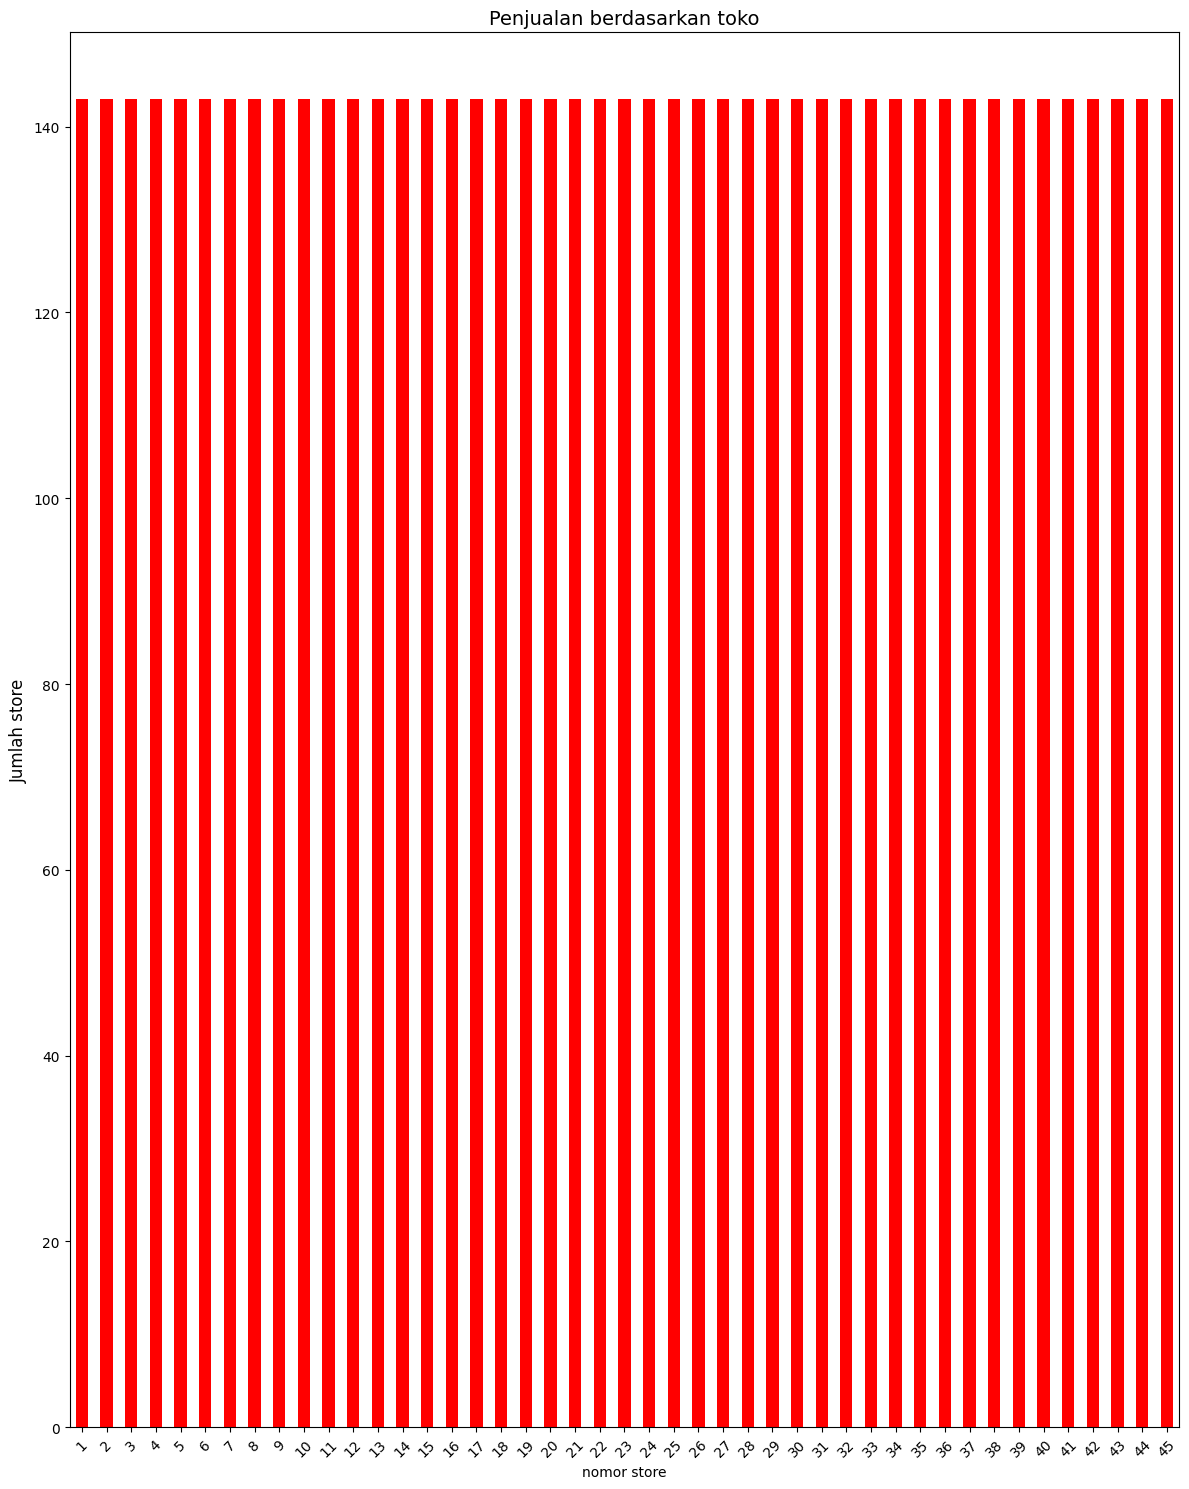

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

sales_walmart = pd.read_csv('Walmart_Sales.csv')

plt.figure(figsize=(12, 15))
sales_by_brand = sales_walmart['Store'].value_counts()
sales_by_brand.plot(kind='bar', color='red')
plt.title('Penjualan berdasarkan toko', fontsize=14)
plt.xlabel('nomor store')
plt.ylabel('Jumlah store', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


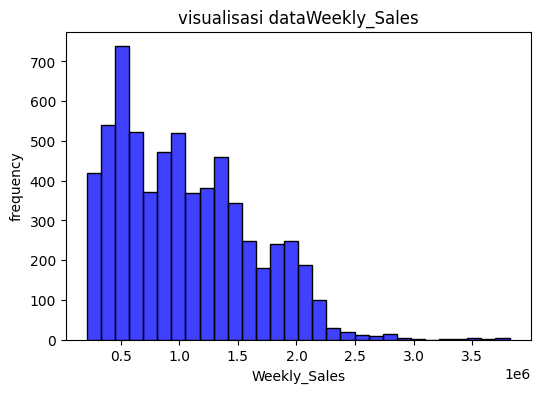

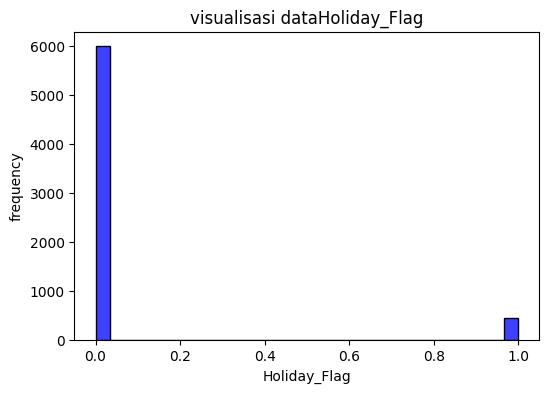

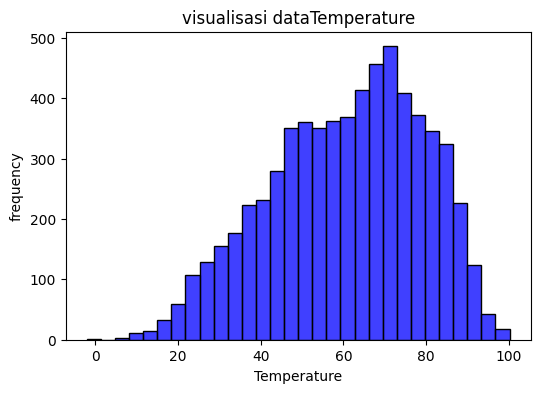

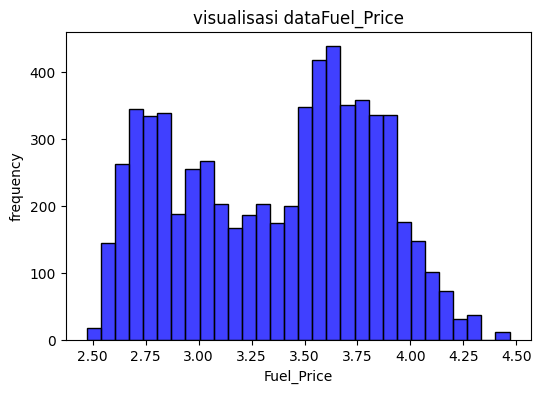

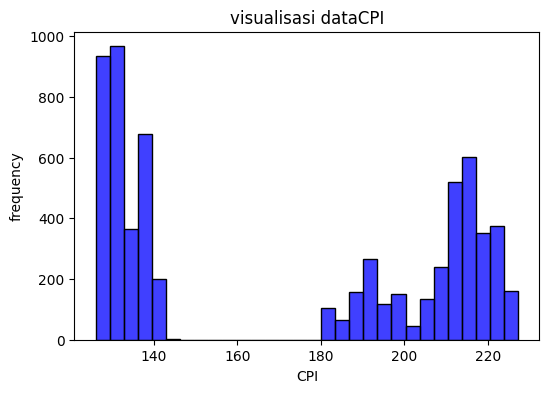

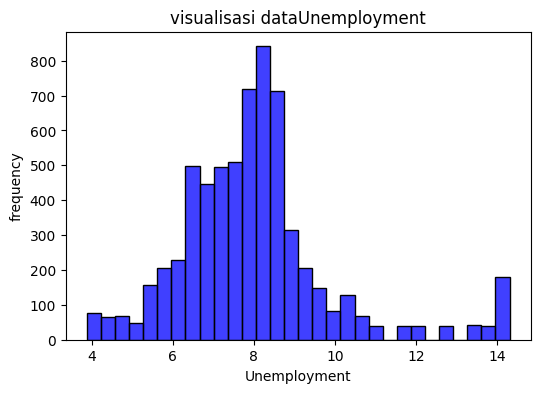

In [68]:
import seaborn as sns

numerical_columns = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

#Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], bins=30, color='blue')
    plt.title('visualisasi data' + column)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()

# **Data Preparation**

In [69]:
df_drop = df.drop(columns='Unemployment')
df_drop

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143
...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854


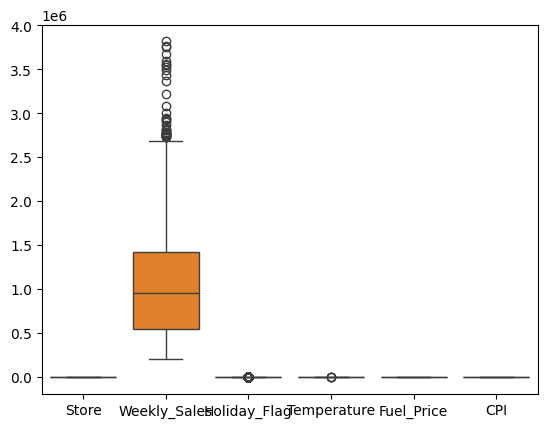

In [70]:
sns.boxplot(df_drop)
plt.show()

In [71]:
df_hapus = df_drop
coloumns = 'Weekly_Sales'

Q1 = df_hapus[coloumns].quantile(0.25)
Q3 = df_hapus[coloumns].quantile(0.75)
IQR = Q3 - Q1


df_hapus.loc[df_hapus[coloumns] < (Q1 - 1.5 * IQR ), coloumns] = (Q1 - 1.5 * IQR )
df_hapus.loc[df_hapus[coloumns] > (Q3 + 1.5 * IQR ), coloumns] = (Q3 + 1.5 * IQR )
print(df_hapus)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  
0     211.096358  
1

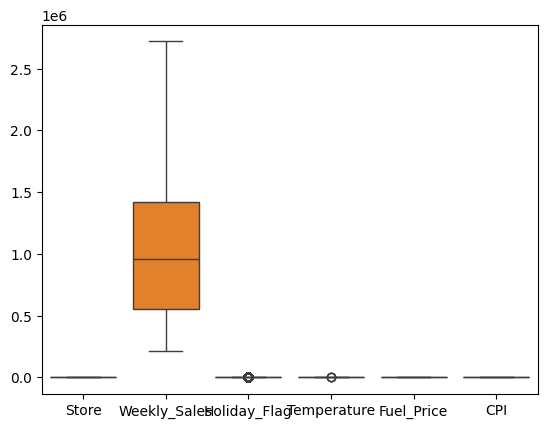

In [72]:
sns.boxplot(df_hapus)
plt.show()

In [73]:
df_hapus1 = df_hapus
coloumns = 'Holiday_Flag'

Q1 = df_hapus1[coloumns].quantile(0.25)
Q3 = df_hapus1[coloumns].quantile(0.75)
IQR = Q3 - Q1


df_hapus1.loc[df_hapus1[coloumns] < (Q1 - 1.5 * IQR ), coloumns] = (Q1 - 1.5 * IQR )
df_hapus1.loc[df_hapus1[coloumns] > (Q3 + 1.5 * IQR ), coloumns] = (Q3 + 1.5 * IQR )
print(df_hapus1)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             0        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  
0     211.096358  
1

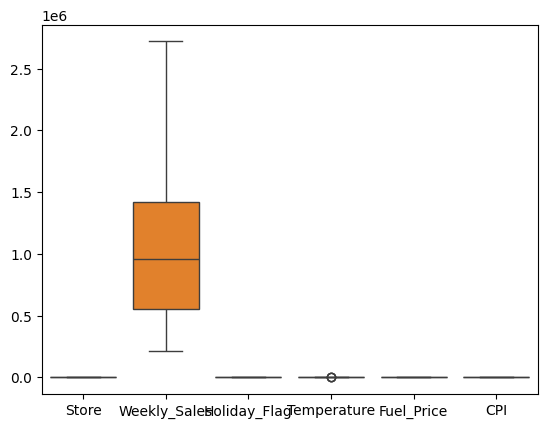

In [74]:
sns.boxplot(df_hapus1)
plt.show()

In [75]:
df_hapus2 = df_hapus1
coloumns = 'Temperature'

Q1 = df_hapus2[coloumns].quantile(0.25)
Q3 = df_hapus2[coloumns].quantile(0.75)
IQR = Q3 - Q1


df_hapus2.loc[df_hapus2[coloumns] < (Q1 - 1.5 * IQR ), coloumns] = (Q1 - 1.5 * IQR )
df_hapus2.loc[df_hapus2[coloumns] > (Q3 + 1.5 * IQR ), coloumns] = (Q3 + 1.5 * IQR )
print(df_hapus2)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             0        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  
0     211.096358  
1

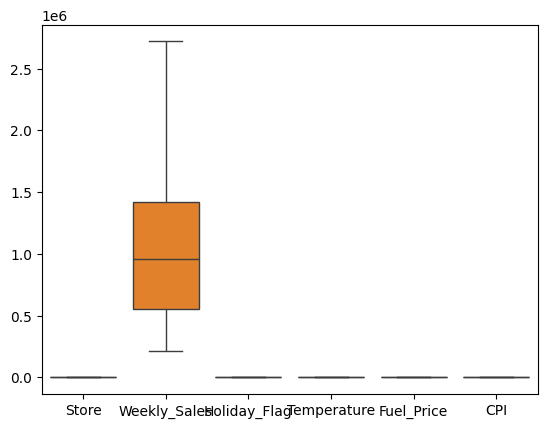

In [76]:
sns.boxplot(df_hapus2)
plt.show()

# **Clustering**


In [77]:
df_hapus2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 352.0+ KB


In [ ]:
# Pastikan kolom numerik dipilih setelah groupby  
df_ag = (  
    df_hapus2.groupby(['Fuel_Price', 'Temperature', 'CPI', 'Holiday_Flag'])
    .agg({  
        col: ['count', 'mean', 'sum'] for col in df_hapus2.select_dtypes(include='number').columns  
    })  
    .reset_index()  
)  
  
print(df_ag)  


     Fuel_Price Temperature         CPI Holiday_Flag Store                 \
                                                     count       mean sum   
0         2.472       45.66  210.045102            0     1  36.000000  36   
1         2.513       80.58  210.264116            0     1  36.000000  36   
2         2.514       39.10  214.666488            0     1   8.000000   8   
3         2.514       39.69  210.945160            0     1   2.000000   2   
4         2.514       39.75  210.945160            0     3  27.333333  82   
...         ...         ...         ...          ...   ...        ...  ..   
5424      4.449       72.71  131.149968            0     2  26.000000  52   
5425      4.449       75.55  131.149968            0     1  33.000000  33   
5426      4.468       71.74  131.108333            0     3  26.000000  78   
5427      4.468       76.03  131.108333            0     2  26.000000  52   
5428      4.468       79.64  131.108333            0     1  33.000000  33   

In [79]:
from sklearn.cluster import KMeans
inert = []

for i in range (1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_ag)
  inert.append(kmeans.inertia_)

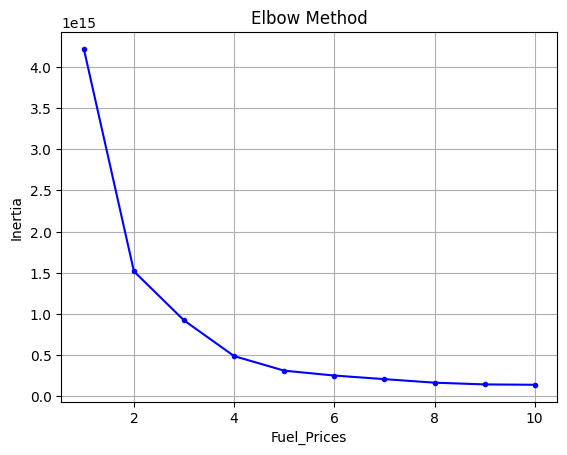

In [80]:
#memperlihatkan data fuel price 1-11
plt.plot(range(1, 11), inert, marker='.', color='b')
plt.xlabel('Fuel_Prices')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [81]:
kmeans.set_params(n_clusters=2)
kmeans.fit(df_ag)

KMeans(n_clusters=2)

In [82]:
df_ag['Cluster'] = kmeans.labels_
df_ag

Fuel_Price Temperature         CPI Holiday_Flag Store                 \
                                                     count       mean sum   
0         2.472       45.66  210.045102            0     1  36.000000  36   
1         2.513       80.58  210.264116            0     1  36.000000  36   
2         2.514       39.10  214.666488            0     1   8.000000   8   
3         2.514       39.69  210.945160            0     1   2.000000   2   
4         2.514       39.75  210.945160            0     3  27.333333  82   
...         ...         ...         ...          ...   ...        ...  ..   
5424      4.449       72.71  131.149968            0     2  26.000000  52   
5425      4.449       75.55  131.149968            0     1  33.000000  33   
5426      4.468       71.74  131.108333            0     3  26.000000  78   
5427      4.468       76.03  131.108333            0     2  26.000000  52   
5428      4.468       79.64  131.108333            0     1  33.000000  33   

     Weekly_Sales                            ... Temperature                 \
            count          mean         sum  ...       count   mean     sum   
0               1  4.702810e+05   470281.03  ...           1  45.66   45.66   
1               1  4.344714e+05   434471.38  ...           1  80.58   80.58   
2               1  9.639604e+05   963960.37  ...           1  39.10   39.10   
3               1  2.124452e+06  2124451.54  ...           1  39.69   39.69   
4               3  9.347278e+05  2804183.26  ...           3  39.75  119.25   
...           ...           ...         ...  ...         ...    ...     ...   
5424            2  1.138121e+06  2276241.80  ...           2  72.71  145.42   
5425            1  2.544123e+05   254412.34  ...           1  75.55   75.55   
5426            3  8.592583e+05  2577774.84  ...           3  71.74  215.22   
5427            2  1.163135e+06  2326269.01  ...           2  76.03  152.06   
5428            1  2.917812e+05   291781.15  ...           1  79.64   79.64   

     Fuel_Price                  CPI                         Cluster  
          count   mean     sum count        mean         sum          
0             1  2.472   2.472     1  210.045102  210.045102       1  
1             1  2.513   2.513     1  210.264116  210.264116       1  
2             1  2.514   2.514     1  214.666488  214.666488       1  
3             1  2.514   2.514     1  210.945160  210.945160       0  
4             3  2.514   7.542     3  210.945161  632.835482       0  
...         ...    ...     ...   ...         ...         ...     ...  
5424          2  4.449   8.898     2  131.149968  262.299935       0  
5425          1  4.449   4.449     1  131.149968  131.149968       1  
5426          3  4.468  13.404     3  131.108333  393.325000       0  
5427          2  4.468   8.936     2  131.108333  262.216667       0  
5428          1  4.468   4.468     1  131.108333  131.108333       1  

[5429 rows x 23 columns]

In [83]:
predict = kmeans.predict(df_ag.drop(columns=['Cluster']))
predict

C:\Users\Iqbal\AppData\Local\Temp\ipykernel_14700\2088622239.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  predict = kmeans.predict(df_ag.drop(columns=['Cluster']))


array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [84]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=2)
pca_df = pca_df.fit_transform(df_ag)

In [85]:
pca_df = pd.DataFrame(pca_df, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = predict

<Axes: xlabel='PCA1', ylabel='PCA2'>

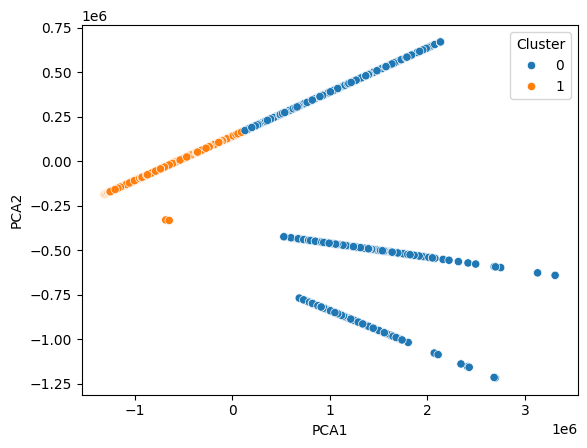

In [86]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df)

In [87]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_ag, predict)
print ("silhouette score:", score)

silhouette score: 0.5630064055324959


### Evaluate the model (before tuning)

In [88]:
param_grid = {
    'n_clusters': range(2, 5),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 500, 700]
}

In [89]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid)
grid_search.fit(df_ag)

C:\Users\Iqbal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [300, 500, 700], 'n_clusters': range(2, 5),
                         'n_init': [10, 20, 30]})

In [90]:
pca_df = PCA(n_components=2)
pca_df = pca_df.fit_transform(df_ag)

In [91]:
#Buat dataframe hasil PCA untuk visualisasi
pca_df = pd.DataFrame(pca_df, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = predict

<Axes: xlabel='PCA1', ylabel='PCA2'>

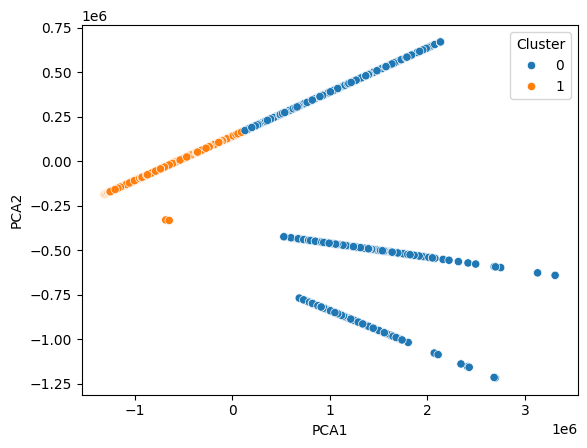

In [92]:
#Visualisasi plot klusterisasi
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df)

In [93]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_ag, predict)
print("Silhouette Score: ", score)


Silhouette Score:  0.5630064055324959


# **Model Tuning**

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
#entukan parameter yang ingin dicoba
param_grid = {
        'n_clusters': range(3, 8),
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30],
        'max_iter': [300, 500, 700]
}

In [96]:
#Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid)

In [97]:
#Fit model dengan data training
grid_search.fit(df_ag)

GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [300, 500, 700], 'n_clusters': range(3, 8),
                         'n_init': [10, 20, 30]})

In [98]:
#Tampilkan hasil (parameter dan silhouute score) dari Grid Search
best_score = -1
best_params = None

In [99]:
for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(df_ag)
    score = silhouette_score(df_ag, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

In [100]:
#Print hasil dari Grid Search untuk parameter dan skor terbaik
print("Parameter terbaiknya :\n", best_params)
print("Score terbaiknya :\n", best_score)

Parameter terbaiknya :
 {'init': 'k-means++', 'max_iter': 500, 'n_clusters': 5, 'n_init': 30}
Score terbaiknya :
 0.609009675747885


# **Linear Regression**

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder

In [102]:
# Inisialisasi encoder
encoder = OrdinalEncoder()

# Transformasi data
df_hapus2["Date"] = encoder.fit_transform(df_hapus2[["Date"]])

# Periksa hasil
print(df_hapus2["Date"].head())

0     19.0
1     52.0
2     85.0
3    118.0
4     20.0
Name: Date, dtype: float64


In [103]:
df_hapus2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,1,19.0,1643690.90,0,42.31,2.572,211.096358
1,1,52.0,1641957.44,0,38.51,2.548,211.242170
2,1,85.0,1611968.17,0,39.93,2.514,211.289143
3,1,118.0,1409727.59,0,46.63,2.561,211.319643
4,1,20.0,1554806.68,0,46.50,2.625,211.350143


In [104]:
x = df_hapus2.drop(columns=['Weekly_Sales'])
y = df_hapus2['Weekly_Sales']

print('Variabel Independent :\n', x.head())
print('Variabel Dependent :\n', y.head())

Variabel Independent :
    Store   Date  Holiday_Flag  Temperature  Fuel_Price         CPI
0      1   19.0             0        42.31       2.572  211.096358
1      1   52.0             0        38.51       2.548  211.242170
2      1   85.0             0        39.93       2.514  211.289143
3      1  118.0             0        46.63       2.561  211.319643
4      1   20.0             0        46.50       2.625  211.350143
Variabel Dependent :
 0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [106]:
lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

In [107]:
y_predict = lin.predict(x_test)

In [108]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [109]:
intercept = lin.intercept_
coefi = lin.coef_

In [110]:
print("Interceptnya :\n", intercept)
print("Coefisiennya :\n", coefi)

Interceptnya :
 1805673.7424189488
Coefisiennya :
 [-1.55388479e+04 -3.12749368e+02 -4.54747351e-13 -1.27335595e+03
  7.40573953e+03 -1.91670874e+03]


In [111]:
x_constant = sm.add_constant(x)
ols_lin = sm.OLS(y, x_constant)
result = ols_lin.fit()

In [112]:
print("P-Valuenya :\n", result.pvalues)

P-Valuenya :
 const           5.063626e-163
Store           5.666320e-197
Date             1.352971e-01
Holiday_Flag     6.574137e-02
Temperature      1.056726e-04
Fuel_Price       1.662389e-01
CPI              2.613393e-29
dtype: float64


In [113]:
mse = mean_squared_error(y_test, y_predict)
print("Mse-nya :\n", mse)

Mse-nya :
 265686282275.13214


In [114]:
r2 = r2_score(y_test, y_predict)
print("R2-nya :\n", r2)

R2-nya :
 0.1494393949949172
